In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load dataset
df = pd.read_csv("cleaned_agri_wages.csv")

# Step 3: Select features (independent variables) and target (dependent variable)
# Example: Predict 'monthly_average_wage' using gender, year, state, labour_type
# Make sure to adjust features depending on your cleaned dataset columns
X = df[['year', 'gender', 'state_name', 'labour_category']]
y = df['monthly_average_wage']

# Step 4: Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Intercept: -49237.08541876156
Coefficients: [ 24.55981853 -35.97994196 -20.19866909  -4.82510274 -60.19970934
 -21.1199388  104.92125624   9.46439454 -43.14948501  -1.4227286
 208.60122189 -27.97672653 -64.27168736 -38.29200145  87.60222636
  15.14728353   4.47575922  -6.54363271  36.74566087  -1.79522753
  61.158623   -24.19473825 -12.51204133   3.37936687  63.3295758 ]
Mean Squared Error: 2742.1974279144474
R² Score: 0.6545661250814558


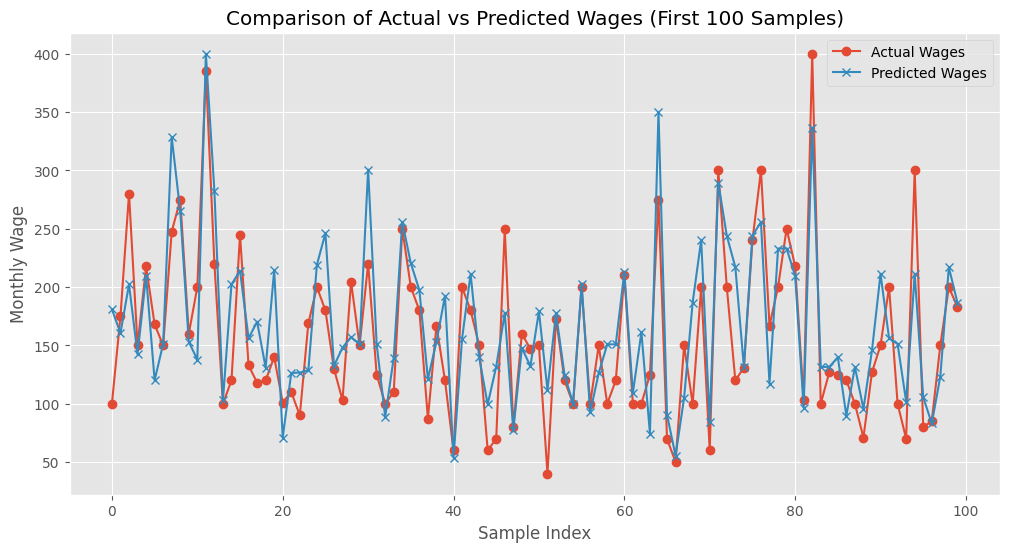

In [ ]:
import matplotlib.pyplot as plt

# Line plot: First 100 predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label="Actual Wages", marker='o')
plt.plot(y_pred[:100], label="Predicted Wages", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Monthly Wage")
plt.title("Comparison of Actual vs Predicted Wages (First 100 Samples)")
plt.legend()
plt.show()


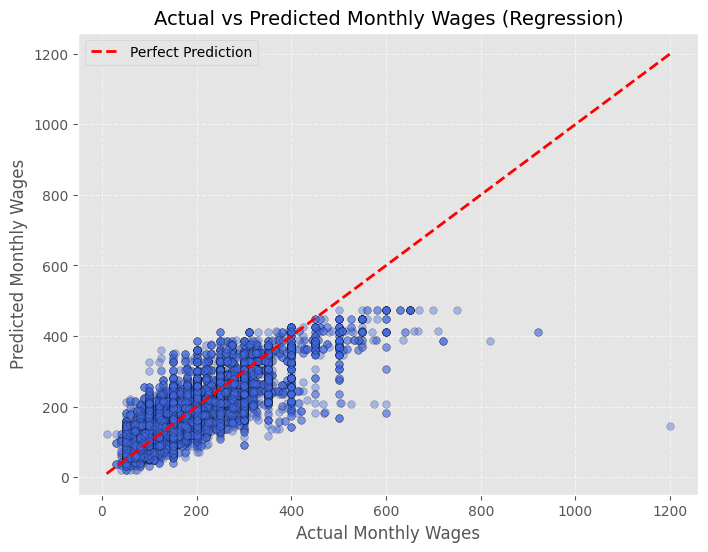

In [ ]:
plt.figure(figsize=(8,6))

# Scatter with transparency and smaller markers
plt.scatter(y_test, y_pred, alpha=0.4, s=30, color="royalblue", edgecolor="k", linewidth=0.3)

# Reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label="Perfect Prediction")

# Labels & title
plt.xlabel("Actual Monthly Wages", fontsize=12)
plt.ylabel("Predicted Monthly Wages", fontsize=12)
plt.title("Actual vs Predicted Monthly Wages (Regression)", fontsize=14)

# Grid & legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


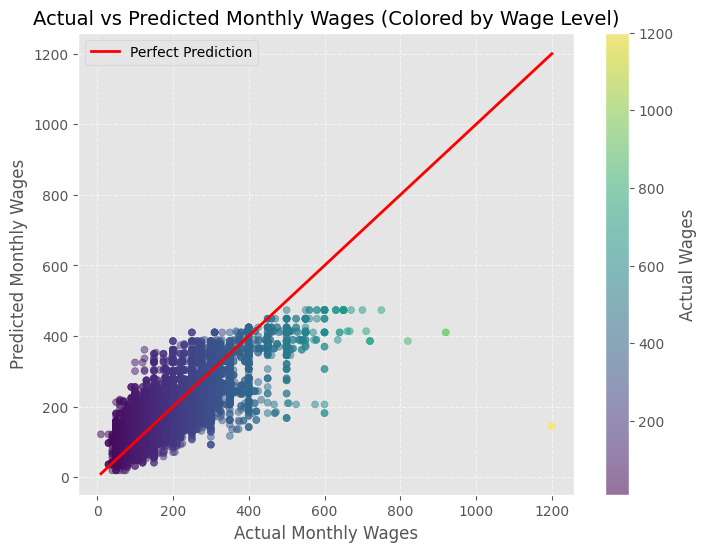

In [ ]:
plt.figure(figsize=(8,6))

# Color mapped to actual wage values
plt.scatter(y_test, y_pred, c=y_test, cmap="viridis", alpha=0.5, s=25)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r-', linewidth=2, label="Perfect Prediction")

plt.colorbar(label="Actual Wages")
plt.xlabel("Actual Monthly Wages", fontsize=12)
plt.ylabel("Predicted Monthly Wages", fontsize=12)
plt.title("Actual vs Predicted Monthly Wages (Colored by Wage Level)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
